In [ ]:
#!pip install jcopml
#!pip install luwiji
#!pip install -U jcopml

# Naive Time Series Forcasting

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("/content/daily_min_temp.csv", index_col="Date", parse_dates=["Date"])
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


## Resampling Data Time Series

In [6]:
df = df.resample("M").mean()
df

<ipython-input-6-eaf099f97d55>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample("M").mean()


,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323
...,...
1990-08-31,7.825806
1990-09-30,9.166667
1990-10-31,11.345161


<Axes: xlabel='Date'>

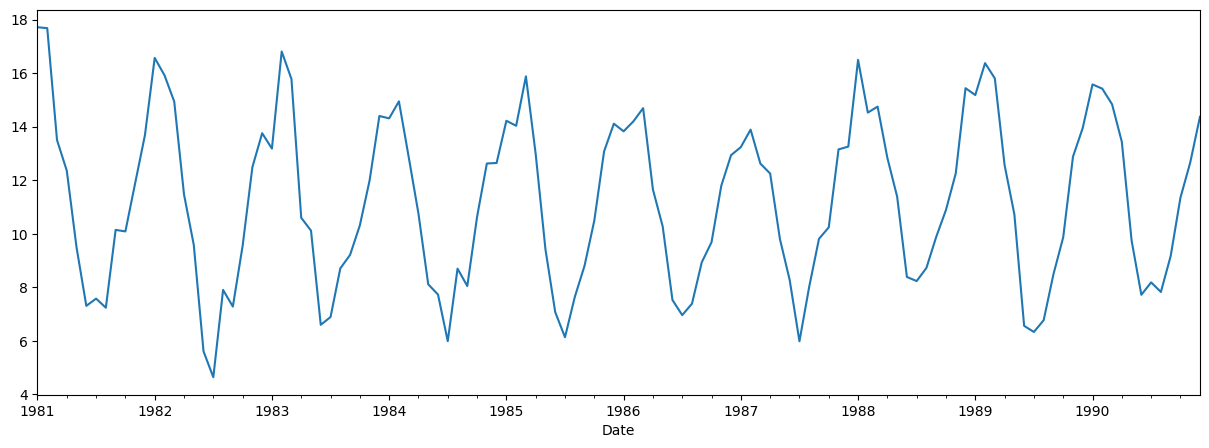

In [7]:
df.Temp.plot(figsize=(15,5))

## One-Shift

In [8]:
pred = df.copy()
pred = pred.shift()

In [9]:
pred

,Temp
Date,
1981-01-31,NaN
1981-02-28,17.712903
1981-03-31,17.678571
1981-04-30,13.500000
1981-05-31,12.356667
...,...
1990-08-31,8.183871
1990-09-30,7.825806
1990-10-31,9.166667


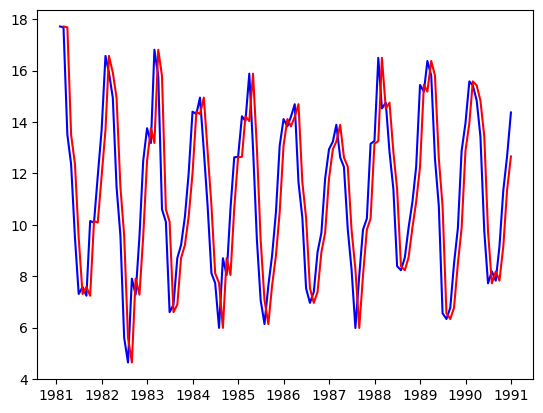

In [10]:
plt.plot(figsize=(15,5))
plt.plot(df, 'b')
plt.plot(pred, 'r')

## Mean as Forecast

In [11]:
pred = df.copy()
pred.Temp = [df.loc[:date].Temp.mean() for date in df.index]
pred = pred.shift()

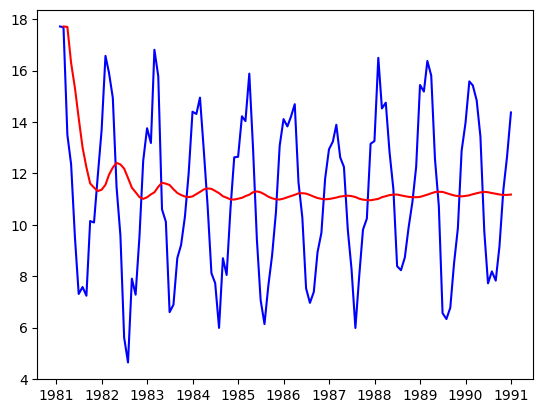

In [12]:
plt.plot(figsize=(15,5))
plt.plot(df, 'b')
plt.plot(pred, 'r')

## Moving Average / Rolling Mean Forecasting

In [13]:
pred = df.copy()
pred.Temp = df.rolling(3).mean()
pred = pred.shift()

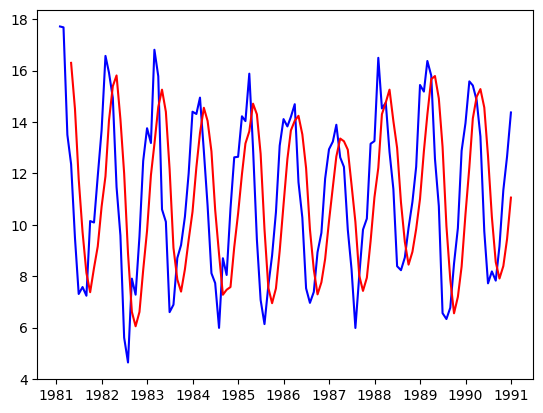

In [14]:
plt.plot(figsize=(15,5))
plt.plot(df, 'b')
plt.plot(pred, 'r')

# Classic Time Series Decomposition -> 1920

Teknik untuk memisahkan time series menjadi trend, seasonal, dan residual menggunakan Moving Average. Ada 2 tipe :


> additive = Trend + Seasonal + Residual


> multiplicative = Trend * Seasonal * Residual


Additive dipakai pada **trend dan seasonal yang tidak terlalu bervariasi**.\
Multiplicative dipakai pada **trend dan seasonal yang berubah seiring berjalannya waktu**.

Contoh :


*   Additive : Terdapat peningkatan pelanggan 10000 orang/tahun.
*   Multiplicative : Terdapat peningkatan pelanggan 10%/tahun.

## Contoh Additive

In [17]:
#!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 29.6 MB/s eta 0:00:00


In [18]:
from jcopml.time_series.decomposition import additive_decomposition

In [ ]:
df = pd.read_csv("/content/cheese_fred.csv", index_col="date", parse_dates=["date"])
series = df.total_cheese_production
series.plot(figsize=(15,3))

In [ ]:
components = additive_decomposition(series, plot=True)

## Contoh untuk Multiplicative

In [ ]:
from jcopml.time_series.decomposition import multiplicative_decomposition

In [ ]:
df = pd.read_csv("/content/airline.csv", index_col="Date", parse_dates=["Date"])
series = df.passengers
series.plot(figsize=(15,3))

In [ ]:
components = multiplicative_decomposition(series, plot=True)

# Seasonal-Trend decomposition with LOESS (STL) -> 1990

LOESS (locally estimated scatterplot smoothing) mulanya didesain untuk smoothing scatterplot. Idenya adalah menggunakan Moving Regression.\
STL sendiri memiliki beberapa kelebihan :


*   komponen seasonal bisa berubah seiring waktu
*   smoothing pada trend dan seasonal

In [ ]:
from jcopml.time_series.decomposition import stl_decomposition

In [ ]:
df = pd.read_csv("/content/airline.csv", index_col="Date", parse_dates=["Date"])
series = df.passengers
series.plot(figsize=(15,3))

In [ ]:
components = stl_decomposition(series, plot=True)

## Seasonal vs Cyclical
Sebagai catatan tambahan, ada perbedaan antara seasonal dan cyclical. Cyclical bergerak naik-turun secara aperiodik (tanpa periode yang tetap), contoh seperti harga saham.

# Forecasting with ETS (Error-Trens-Seasonal) Method

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from jcopml.time_series.decomposition import additive_decomposition, multiplicative_decomposition

from luwiji.time_series import illustration

In [ ]:
illustration.ets_model

## Exercise 1 : Cheese Production Data

In [ ]:
df = pd.read_csv("/content/cheese_fred.csv", index_col="date", parse_dates=["date"])
series = df.total_cheese_production
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [ ]:
components = additive_decomposition(series, plot=True)

### Training

In [ ]:
es = ExponentialSmoothing(X_train, seasonal="add", seasonal_periods=12)
model = es.fit(optimized=True)

### Forecast

In [ ]:
len(X_train)

In [ ]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b', label='Train')
plt.plot(X_test, 'r', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()

## Exercise 2 : Airline Passenger Data

In [ ]:
df = pd.read_csv("/content/airline.csv", index_col="Date", parse_dates=["Date"])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [ ]:
components = multiplicative_decomposition(series, plot=True)

### Training

In [ ]:
es = ExponentialSmoothing(X_train, trend='mul', seasonal="mul", seasonal_periods=12)
model = es.fit(optimized=True)

### Forecast

In [ ]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b', label='Train')
plt.plot(X_test, 'r', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()

## Exercise 3 : Christmas Search Interest (from Google Trend)

In [ ]:
df = pd.read_csv("/content/christmas.csv", index_col="date", parse_dates=["date"])
series = df.interest
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

### Training

In [ ]:
es = ExponentialSmoothing(X_train, seasonal="add", seasonal_periods=12)
model = es.fit(optimized=True)

### Forecast

In [ ]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b', label='Train')
plt.plot(X_test, 'r', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()

## Exercise 4 : Champagne Sales

In [ ]:
df = pd.read_csv("/content/perrin_freres_champagne.csv", index_col="date", parse_dates=["date"])
series = df.sales
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

### Training

In [ ]:
es = ExponentialSmoothing(X_train, seasonal="mul", seasonal_periods=12)
model = es.fit(optimized=True)

### Forecast

In [ ]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b', label='Train')
plt.plot(X_test, 'r', label='Test')
plt.plot(pred, 'g--', label='Forecast')
plt.legend()

# Auto ETS (Belom Kelar ces)

In [ ]:
from jcopml.time_series import AutoETS

In [ ]:
df = pd.read_csv("/content/daily_min_temp.csv", index_col="Date", parse_dates=["Date"])
df = df.resample('M').mean()
series = df.Temp
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [ ]:
test_size = 0.2
model = AutoETS(X_train, test_size, scoring="mse")

In [ ]:
cv_results

## Forecast

In [ ]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

# Forecasting with ARIMA Model

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.time_series import illustration, demo

## Konsep Stationerity
Sebuah time series disebut stationary ketika sifatnya tidak bergantung terhadap waktu. Time series yang stationary tidak memiliki pola yang predictable pada jangka waktu yang panjang. Contoh :


*   stationary : white noise, cyclical time series yang **aperiodic, tanpa trend, tanpa seasionality**.
*   tidak stationary : time series dengan trend dan seasonality.

(Hyndman et al., 2018)



In [ ]:
illustration.stationarity_quiz

*d, h, i* : seasonal\
*a, c, e, f, i* : trend\
*b dan g* : stationary

## Uji Stationarity menggunakan ADF dan KPSS
ADF = Augmented Dicky-Fuller Test\
KPSS = Kwiatkowski-Phillips-Schmidt-Shin Test

In [ ]:
from jcopml.time_series import stationarity_tester

###Example 1 : Data Stationary

In [ ]:
plt.plot(demo.stationary_data)

In [ ]:
stationarity_tester(demo.stationary_data)

### Example 2 : trending data

In [ ]:
plt.plot(demo.trending_data)

In [ ]:
stationarity_tester(demo.trending_data)

In [ ]:
plt.plot(demo.trending_data.diff())

In [ ]:
stationarity_tester(demo.trending_data.diff())

### Example 3 : Seasonal data

In [ ]:
df = pd.read_csv("/content/perrin_freres_champagne.csv", index_col="date", parse_dates=["date"])
series = df.sales
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [ ]:
stationarity_tester(series)

In [ ]:
series.diff(12).plot(figsize=(15,3))

In [ ]:
stationarity_tester(series.diff())

### Exercise 4

In [ ]:
df = pd.read_csv("/content/airline.csv", index_col="Date", parse_dates=["Date"])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [ ]:
stationarity_tester(series)

In [ ]:
from jcopml.time_series.decomposition import stl_decomposition

In [ ]:
components = stl_decomposition(series)

In [ ]:
plt.plot(components.resid)

In [ ]:
stationarity_tester(components.resid)

## AutoRegressive Model AR(p)

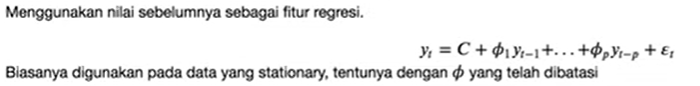

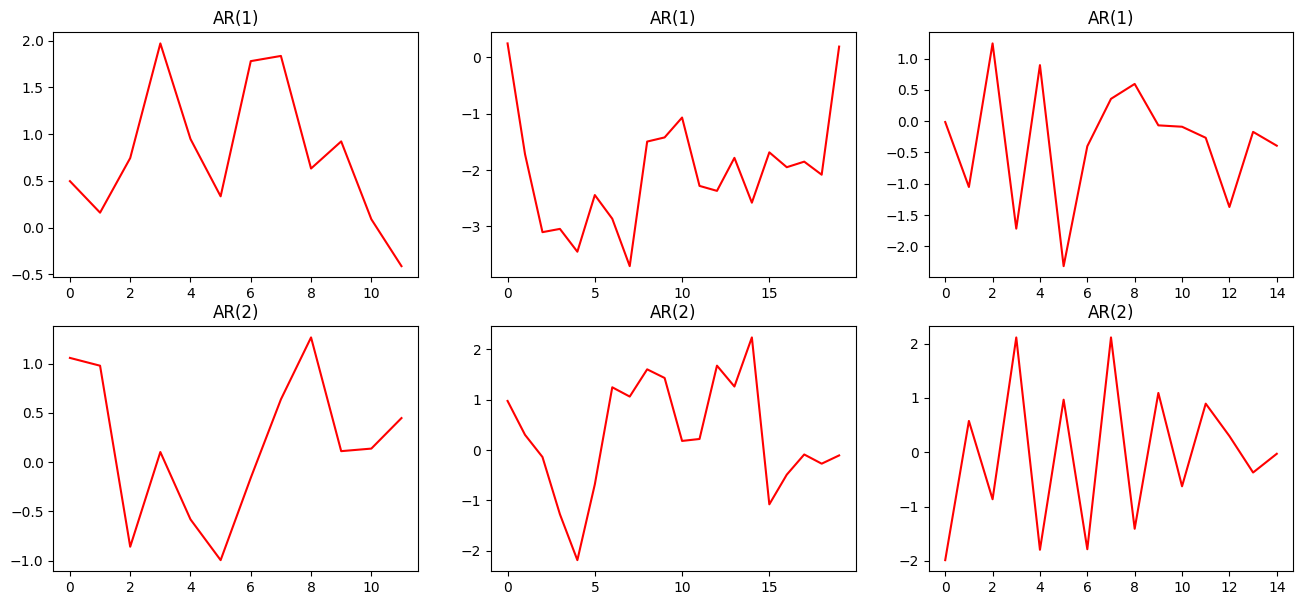

In [21]:
demo.AR_example()

## Moving Average Model MA(q)

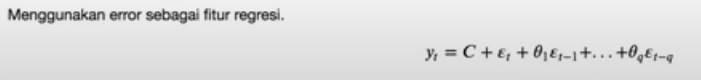

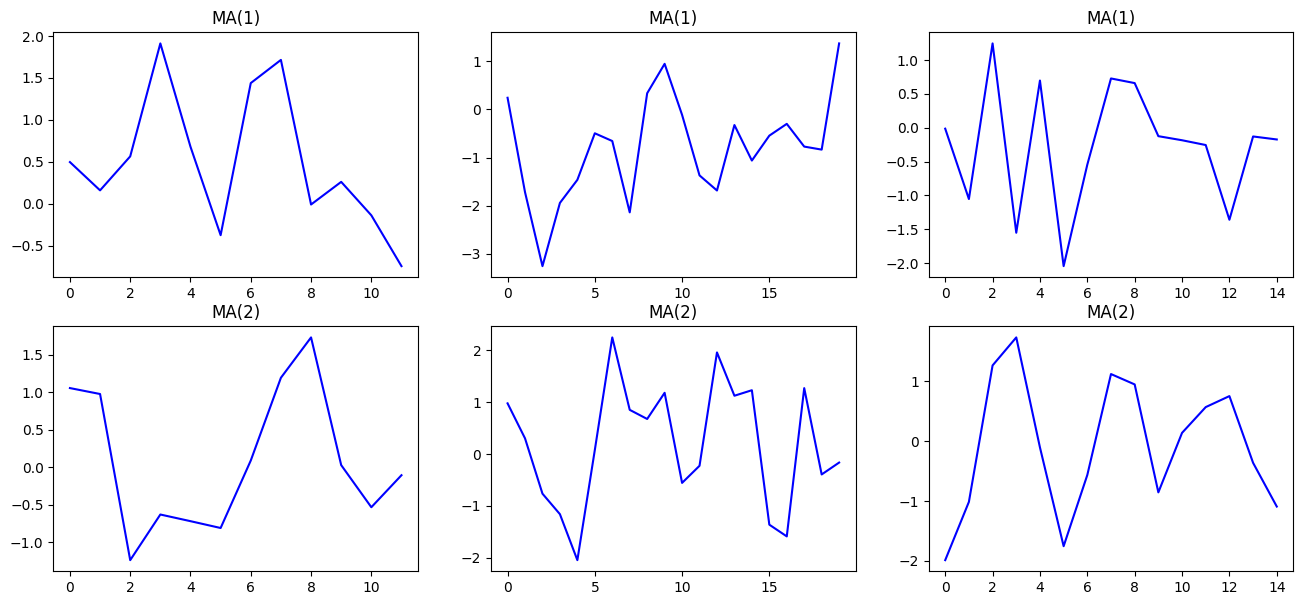

In [22]:
demo.MA_example()

## Bagaimana memilih model ARMA(p,q) -> ACF dan PACF

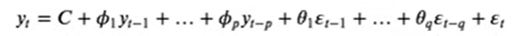

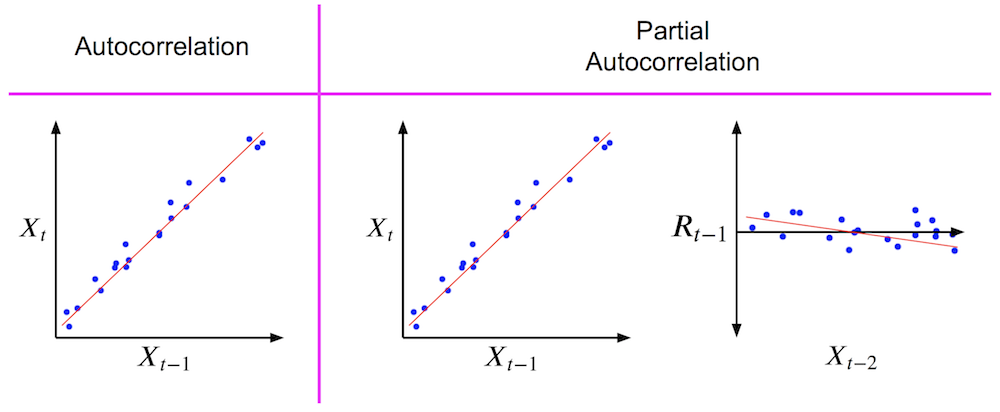

In [23]:
illustration.autocorrelation

## Menentukan orde AR(p)

interactive(children=(FloatSlider(value=0.7, description='alpha1', max=0.9, min=-0.9, step=0.05), Output()), _…

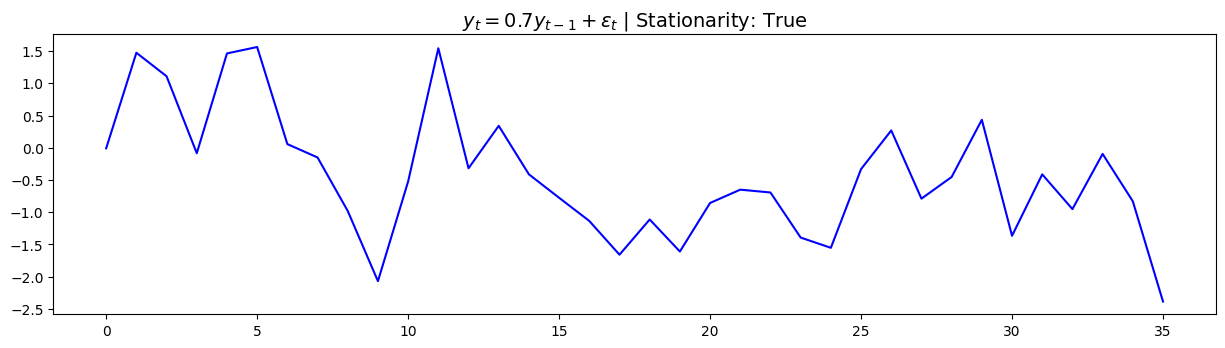

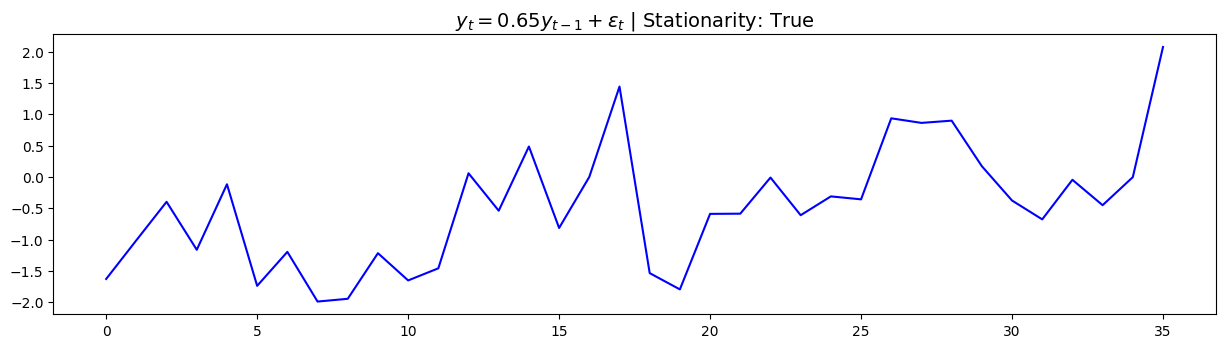

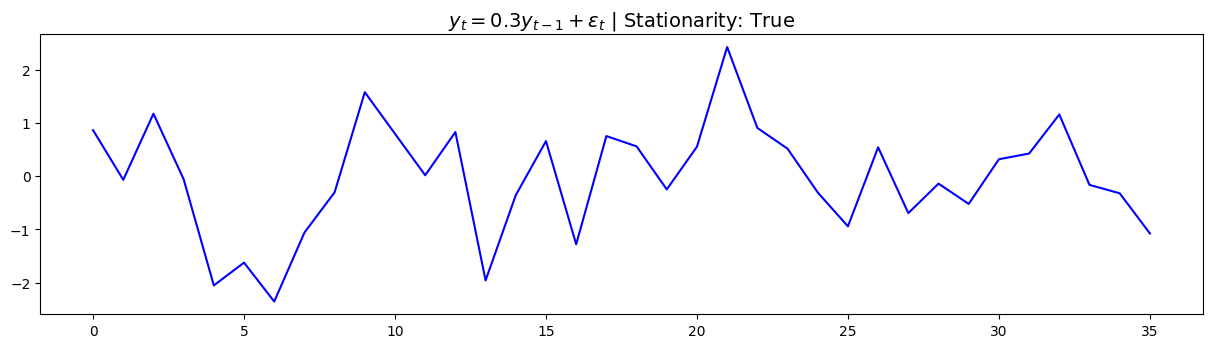

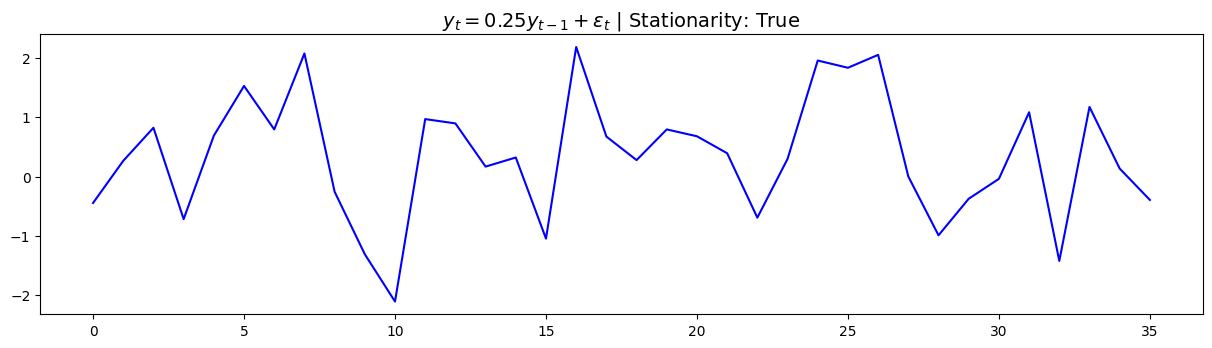

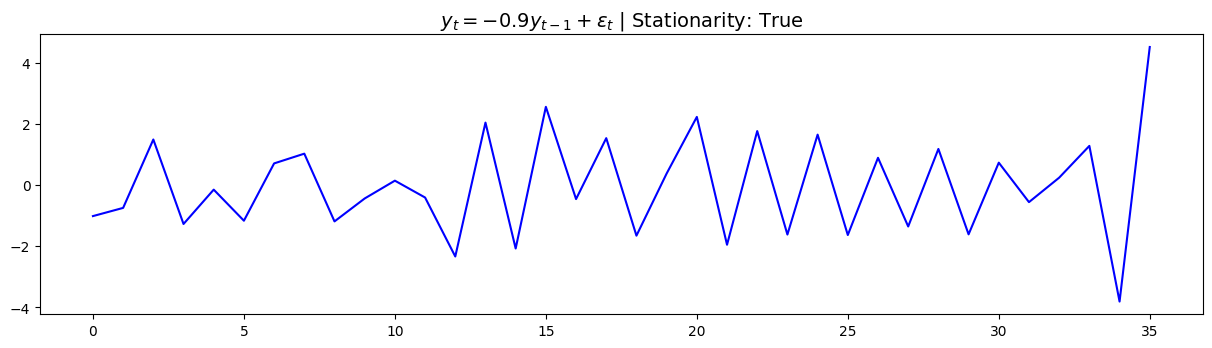

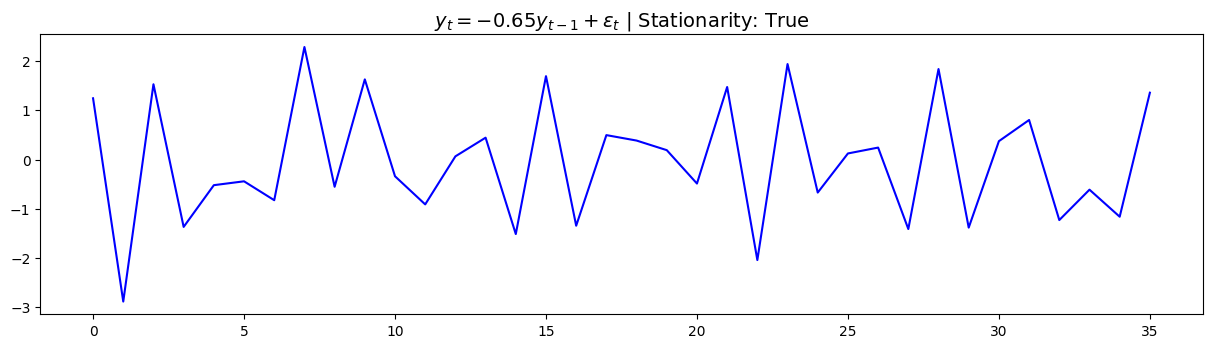

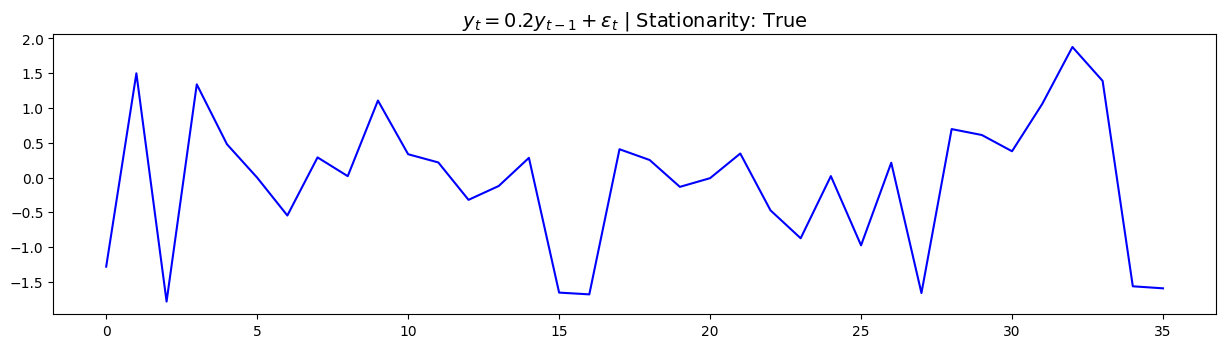

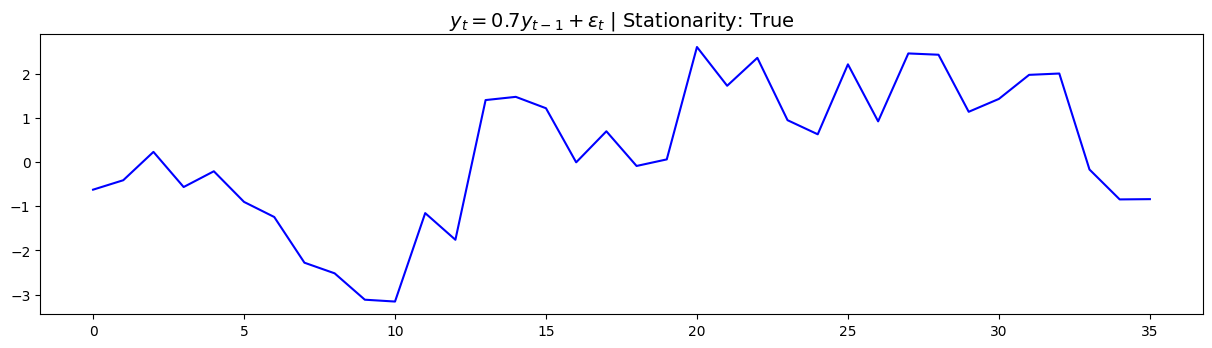

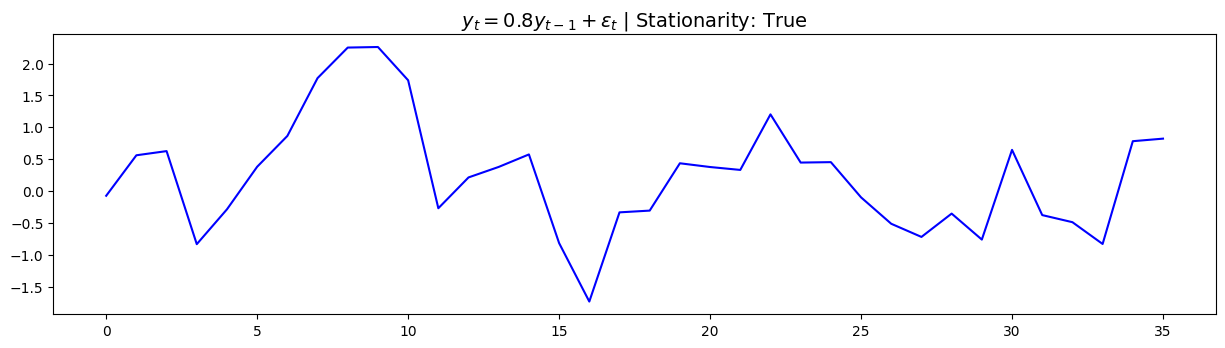

In [26]:
demo.AR1_simulation()

interactive(children=(FloatSlider(value=0.4, description='alpha1', max=0.9, min=-0.9, step=0.05), FloatSlider(…

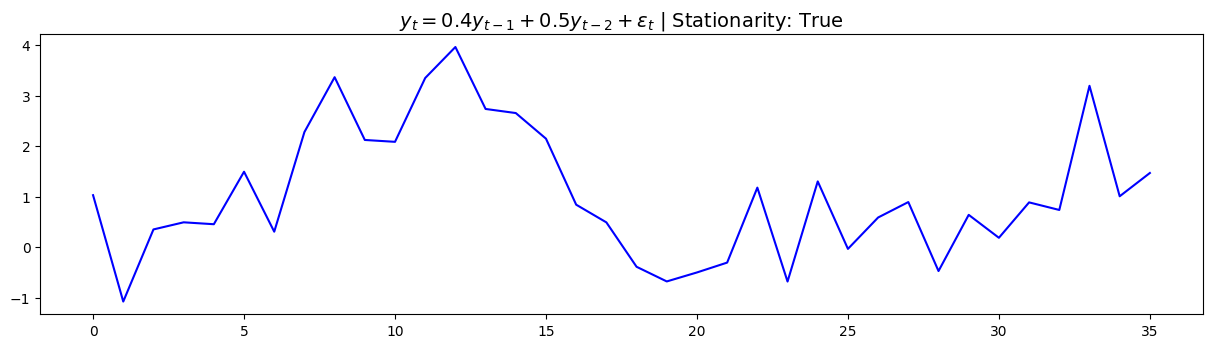

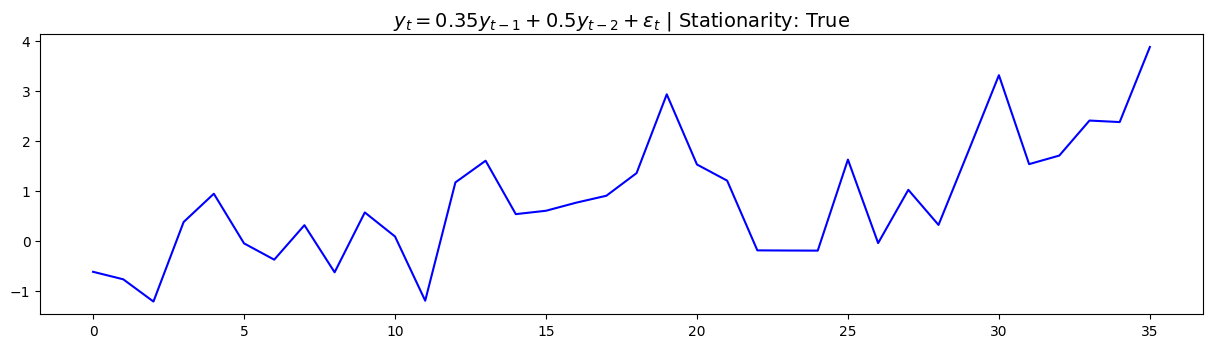

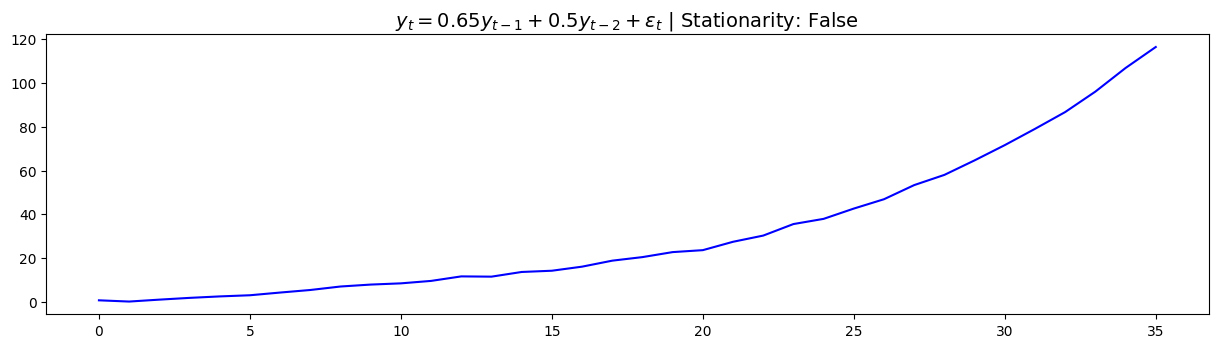

In [28]:
demo.AR2_simulation()

## Menentukan orde MA(q)

interactive(children=(FloatSlider(value=-0.7, description='theta1', max=0.9, min=-0.9, step=0.05), Output()), …

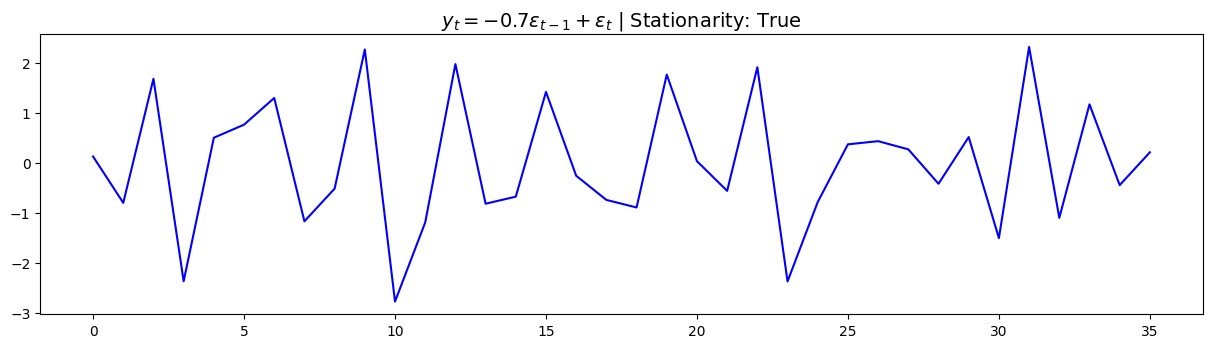

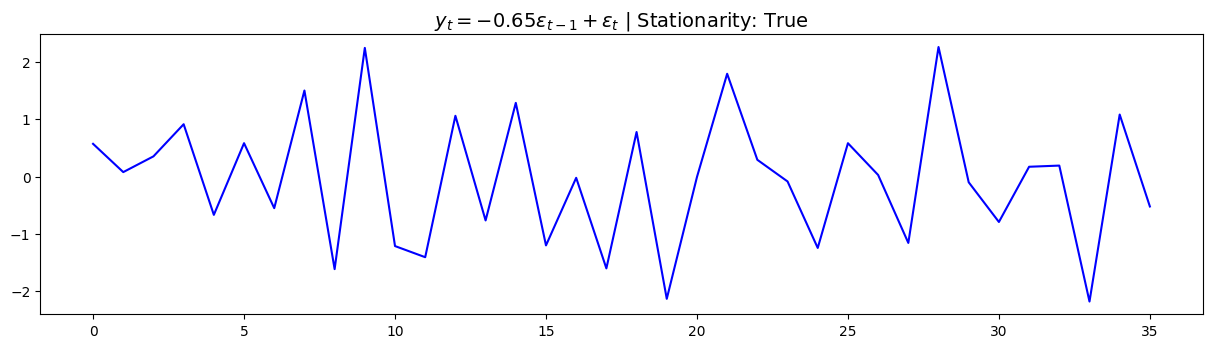

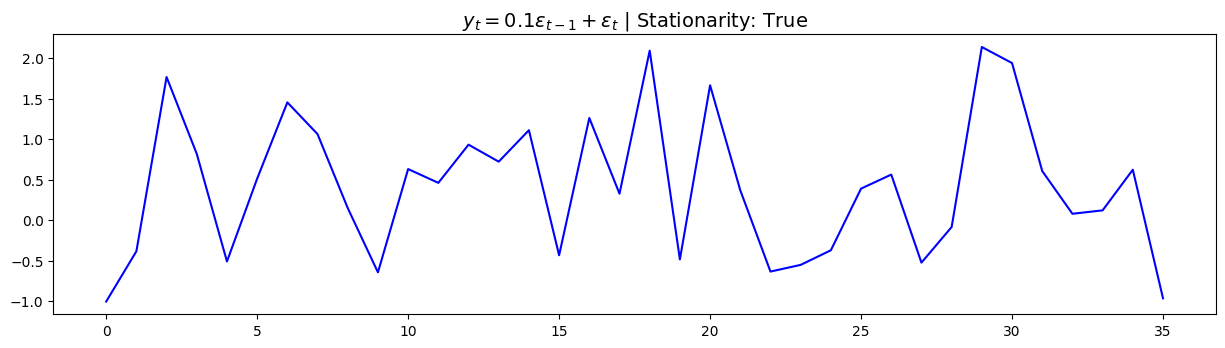

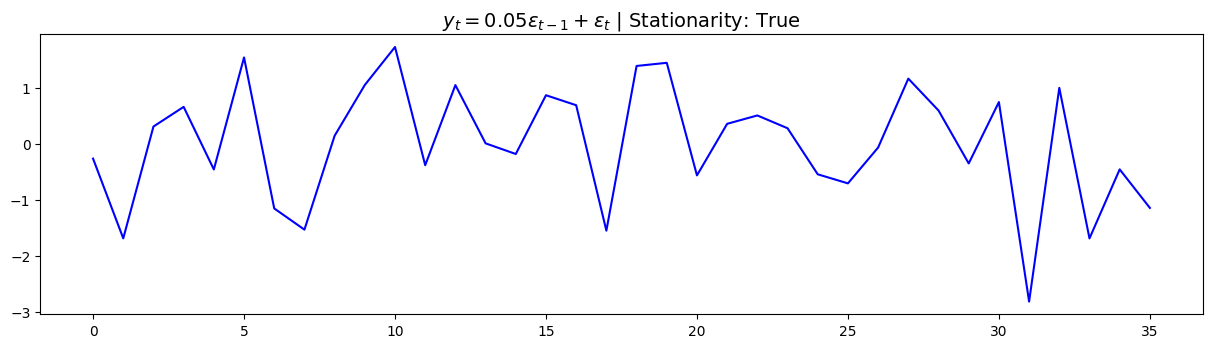

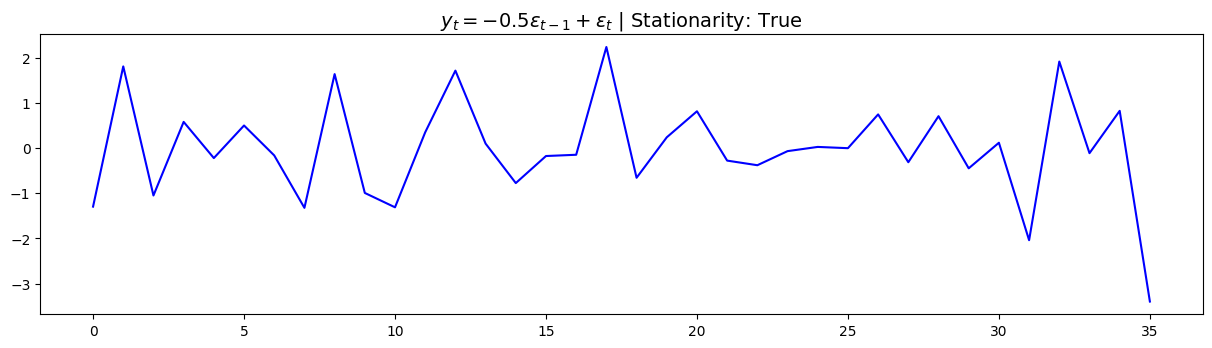

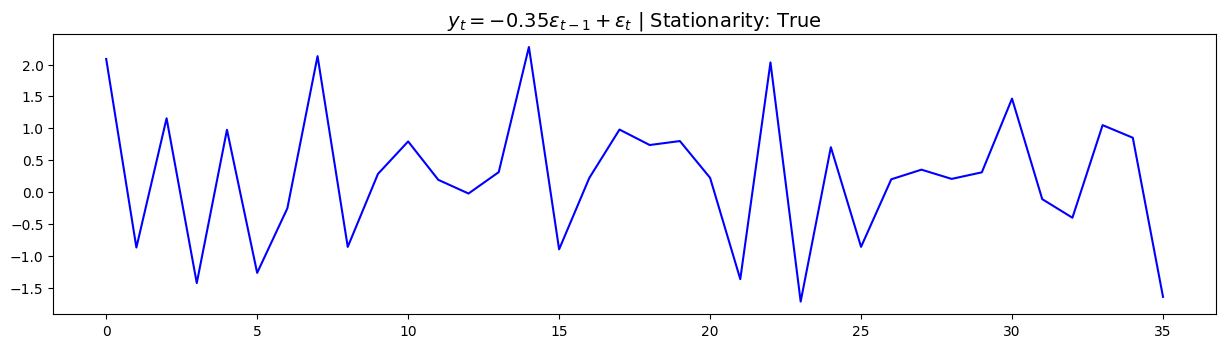

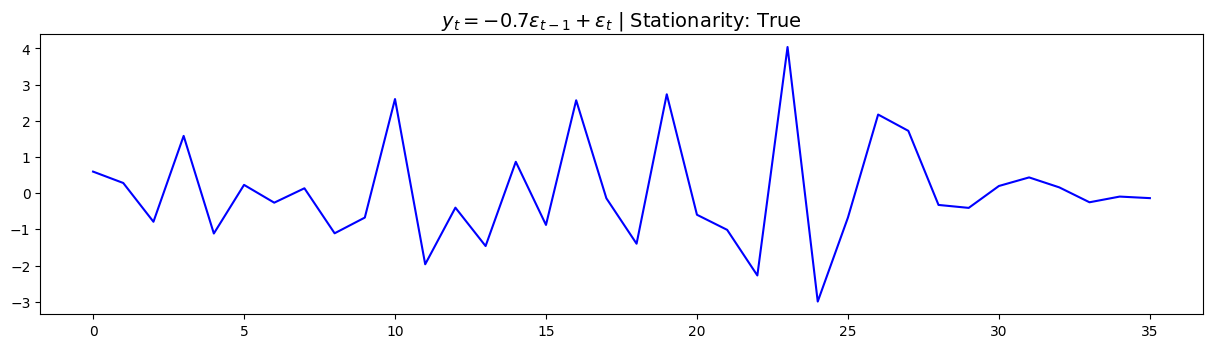

In [29]:
demo.MA1_simulation()

interactive(children=(FloatSlider(value=0.8, description='theta1', max=0.9, min=-0.9, step=0.05), FloatSlider(…

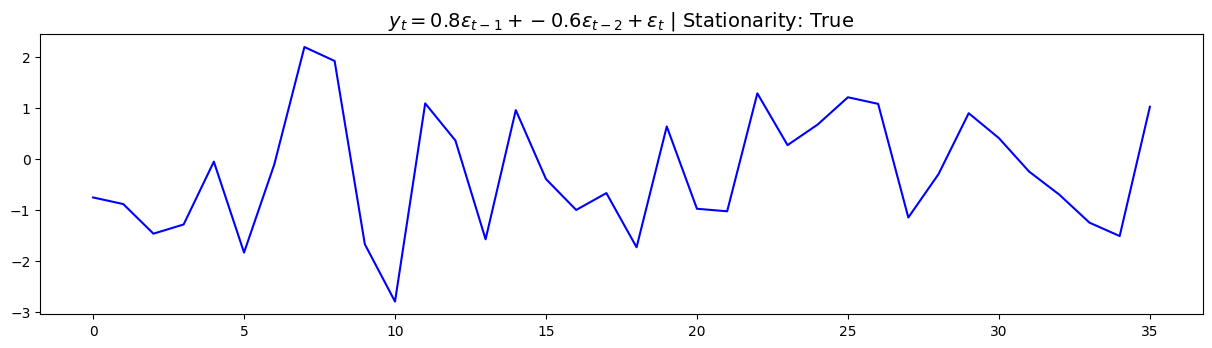

In [30]:
demo.MA2_simulation()

## ARMA(p,q)

interactive(children=(FloatSlider(value=0.7, description='alpha1', max=0.9, min=-0.9, step=0.05), FloatSlider(…

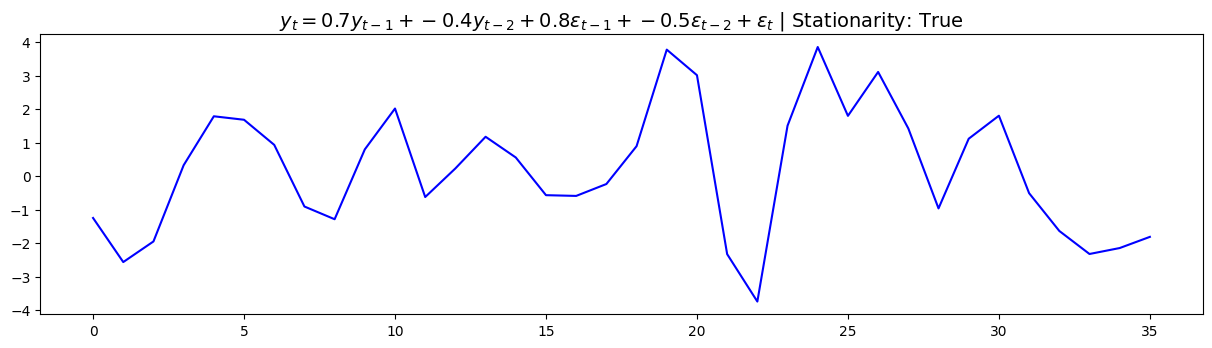

In [34]:
demo.AR2MA2_simulation()

## Nonstationary series? ARIMA(p,d,q)

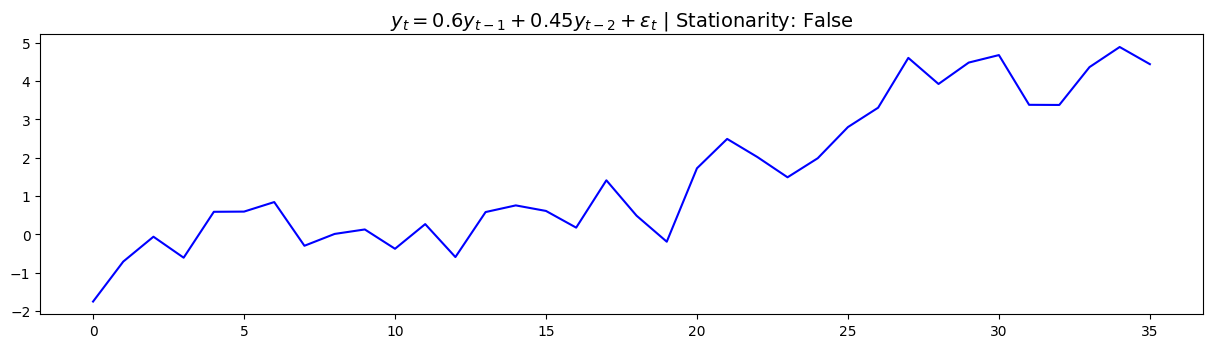

In [36]:
demo.nonstationarity_simulation()

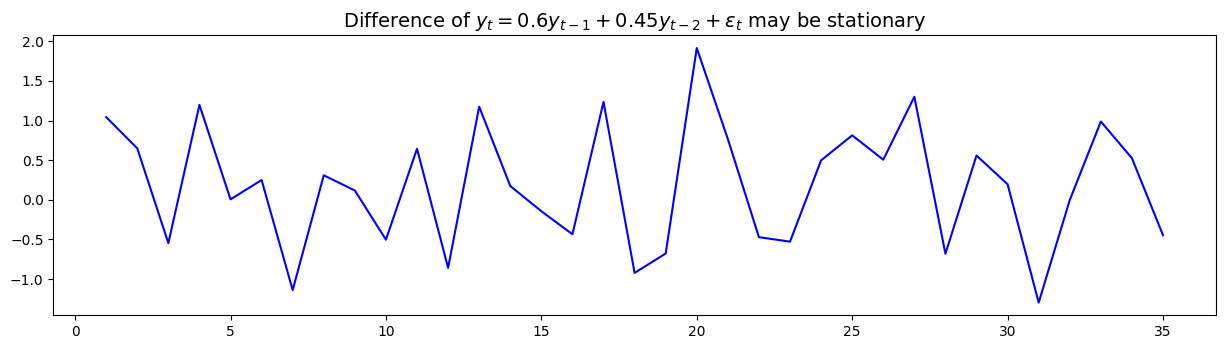

In [37]:
demo.nonstationarity_simulation(diff=True)

## Recommended way -> Model Search dengan AIC, AICc, BIC

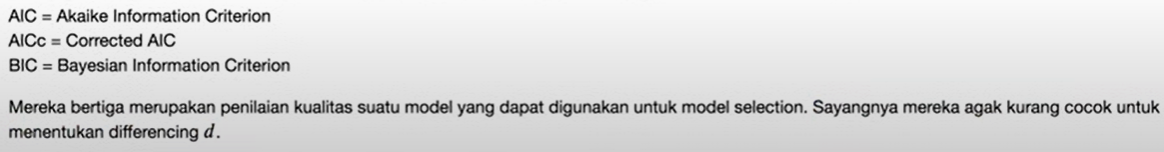

## Auto ARIMA -> Pyramid ARIMA

In [39]:
from pmdarima import auto_arima

<Axes: xlabel='Date'>

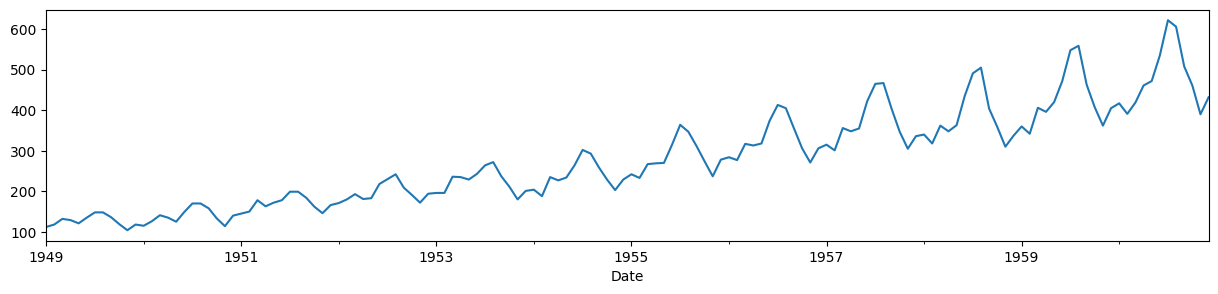

In [52]:
df = pd.read_csv("/content/airline.csv", index_col="Date", parse_dates=["Date"])
series = df.passengers
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

In [53]:
arima = auto_arima(X_train, seasonal=True, m=12, information_criterion="aicc", trace=True, suppress_warnings=True, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aicc
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AICC=807.172, Time=3.49 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AICC=900.025, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,0)[12] intercept   : AICC=803.805, Time=0.37 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,1,1)[12] intercept   : AICC=852.869, Time=0.24 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AICC=1051.707, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AICC=802.465, Time=0.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,1,1)[12] intercept   : AICC=803.877, Time=0.25 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,1,1)[12] intercept   : AICC=805.913, Time=0.64 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AICC=802.029, Time=0.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,0)[12] intercept   : AICC=803.787, Time=0.46 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,1,1)[12] intercept   : AICC=803.864, Time=0.33 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,1,1)[12] intercept   : AICC=inf, Time=1.17 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(0,1,0)[12] intercept   : AICC=802.349, Time=0.22 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AICC=802.578, Time=0.18 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,1,0)[12] intercept   : AICC=802.660, Time=0.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,1,0)[12] intercept   : AICC=804.238, Time=0.35 sec
 ARIMA(2,0,0)(0,1,0)[12]             : AICC=805.721, Time=0.07 sec

Best model:  ARIMA(2,0,0)(0,1,0)[12] intercept
Total fit time: 8.252 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [54]:
arima

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

In [55]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -396.839
Date:                            Mon, 13 Jan 2025   AIC                            801.679
Time:                                    19:43:21   BIC                            812.370
Sample:                                01-01-1949   HQIC                           806.013
                                     - 11-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5597      2.054      2.220      0.026       0.533       8.586
ar.L1          0.6701      0.100      6.694      0.000       0.474       0.866
ar.L2          0.1562      0.097      1.614      0.106      -0.033       0.346
sigma2        96.5155     11.915      8.101      0.000      73.163     119.868
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.92   Prob(JB):                         0.45
Heteroskedasticity (H):               1.47   Skew:                             0.00
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [56]:
n_forecast = len(X_test) + 20
pred = arima.predict(n_periods=n_forecast)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


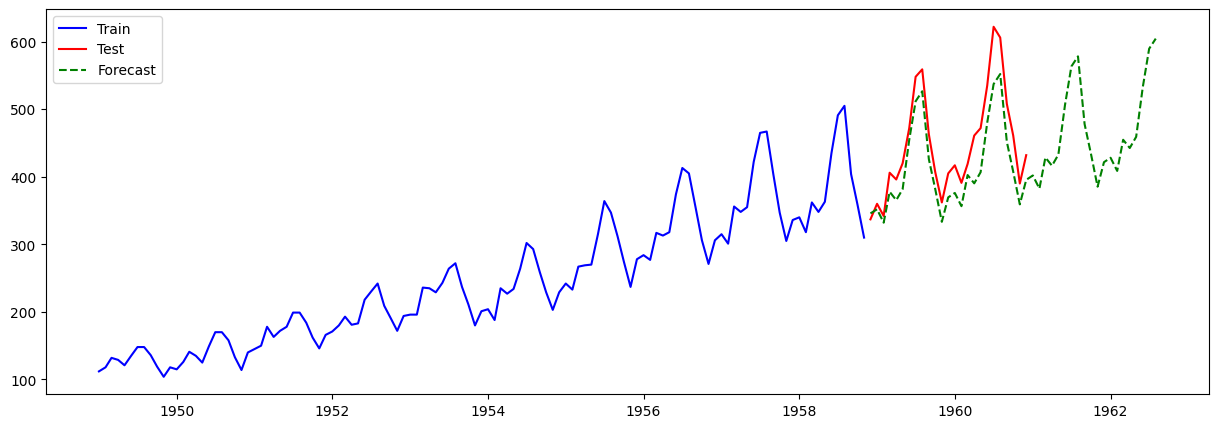

In [58]:
plt.figure(figsize=(15,5))
plt.plot(X_train, "b", label="Train")
plt.plot(X_test, "r", label="Test")
plt.plot(pred, "g--", label="Forecast")
plt.legend()